In [1]:
# Enable interactive rotation of graph
%matplotlib notebook

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = np.loadtxt('sdata.csv',delimiter=',')

<IPython.core.display.Javascript object>


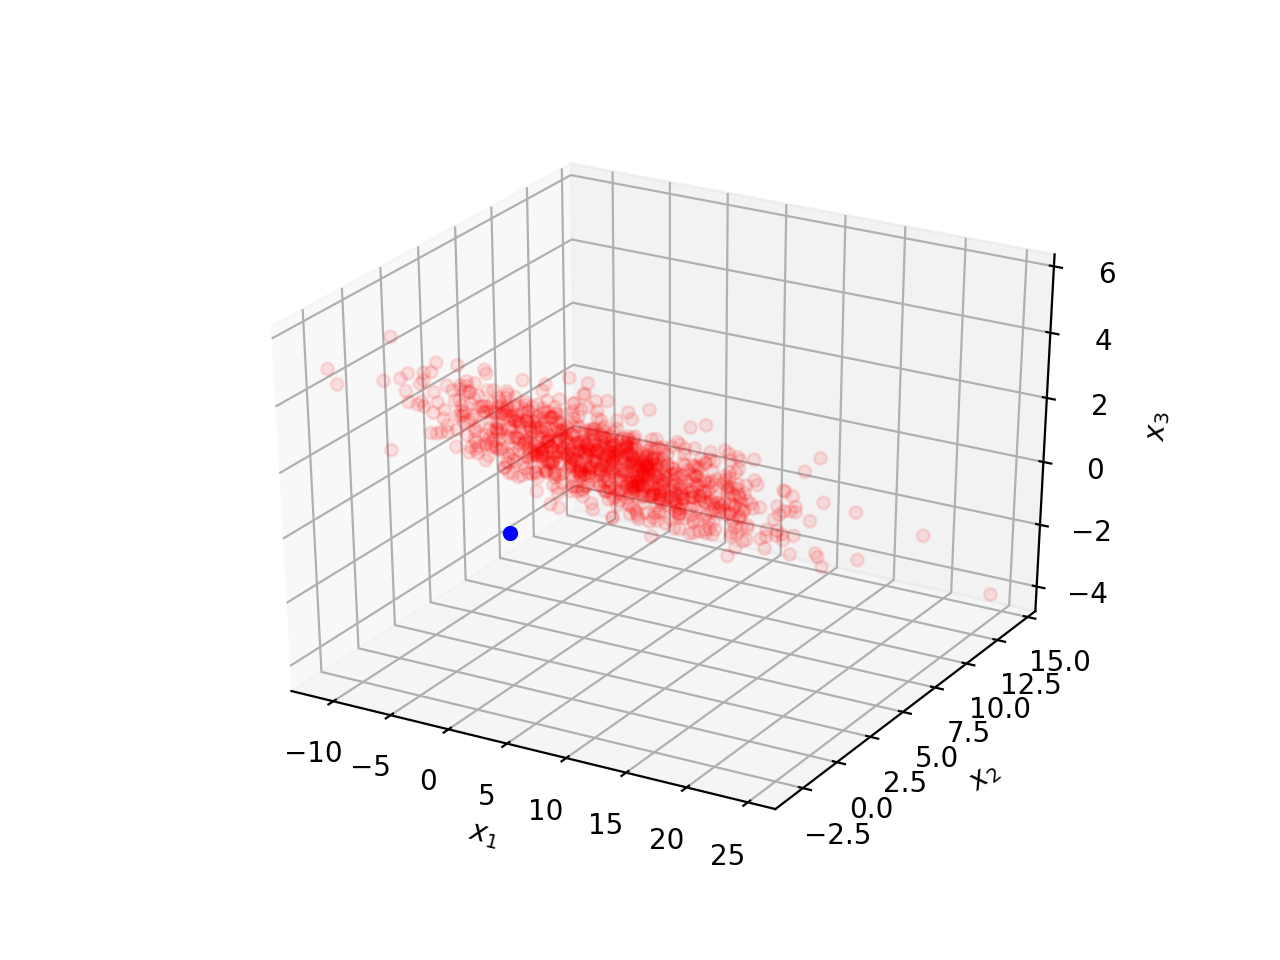

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

## 2a
No, the data does not lie in a low-dimensional subspace, becuase it does not pass the origin.

## 2b
To make it lie within a low-dimensional subspace, center the data so that it passes the origin. 

In [3]:
# Subtract mean
X_m = X - np.mean(X, 0)

<IPython.core.display.Javascript object>


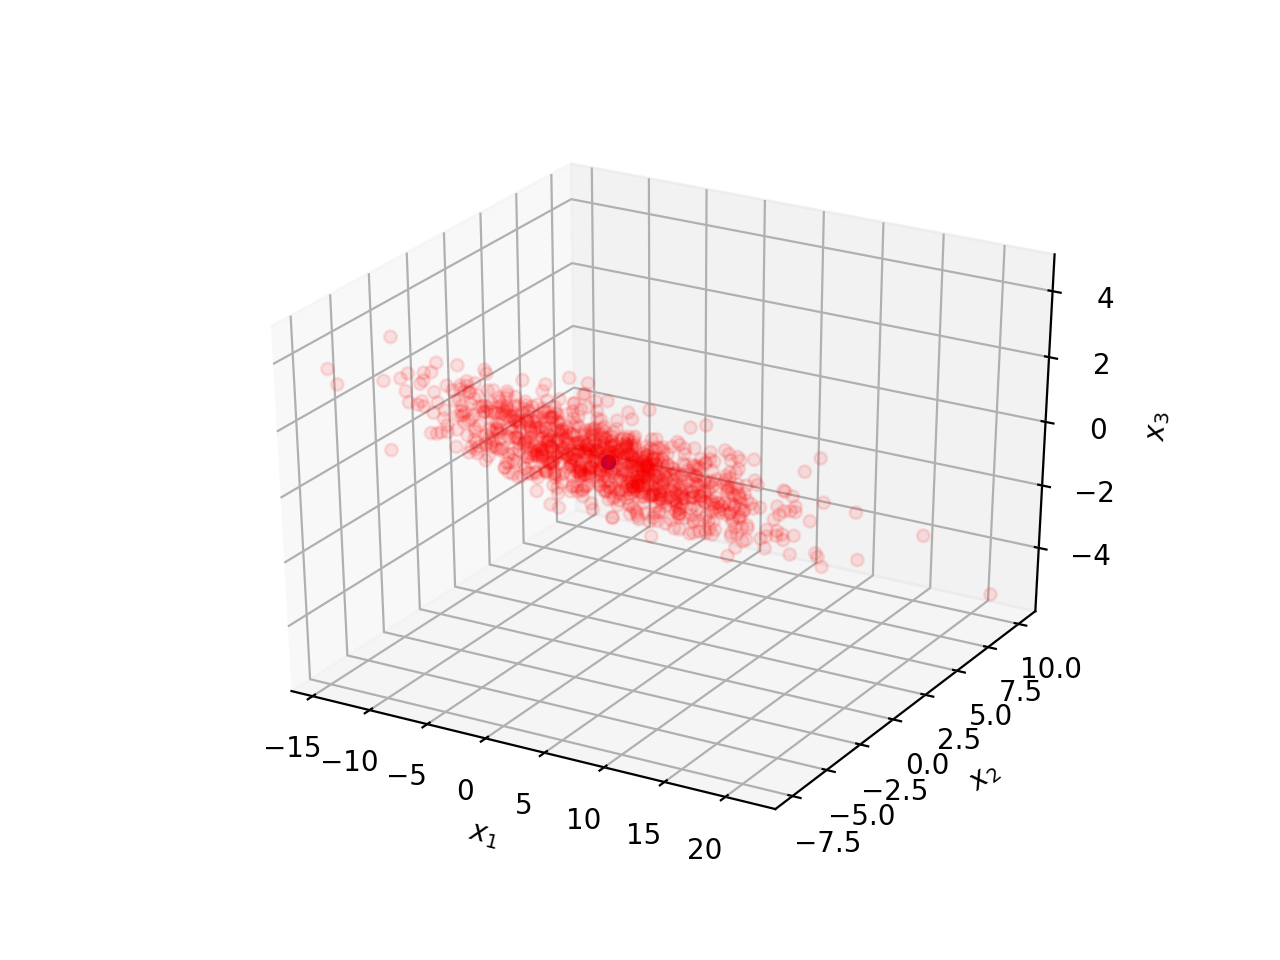

In [4]:
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [5]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a = VT[0, :]

## c
Yes, it now resides in a low dimensional subspace. 

<IPython.core.display.Javascript object>


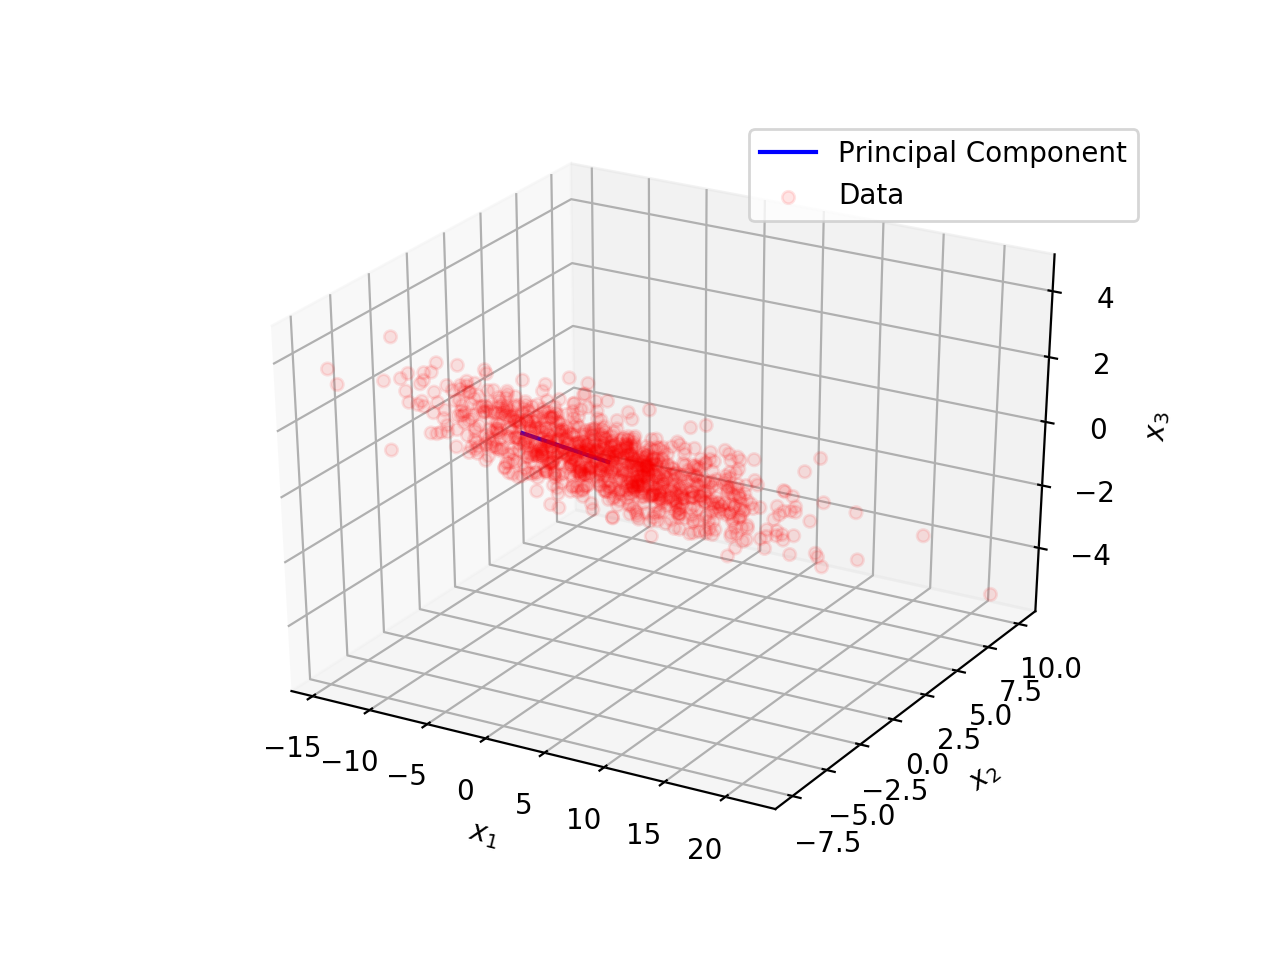

In [6]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

## d
The first PC does fit very well to the data. 

## e
wi = s[0] @ U[:, 0]

In other words, wi is the first singular value times the first col of U

## f
b = np.mean(X, 0)

## g
E = ||E|| = sum of squared singular values, from the 2nd entry to the last entry.

## h
Now trying rank 2 approx

<IPython.core.display.Javascript object>


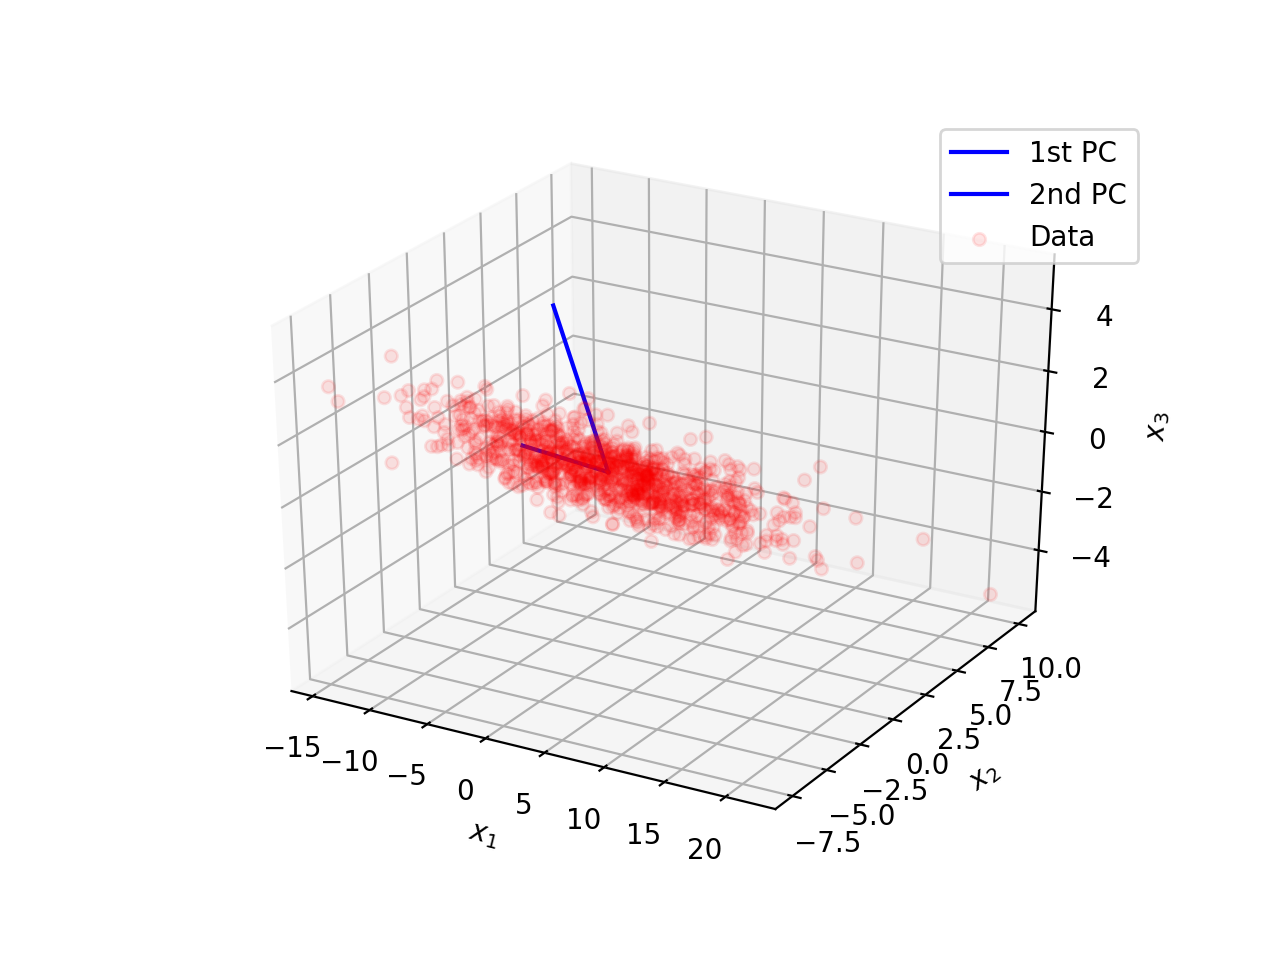

In [7]:
a1 = VT[0, :]
a2 = VT[1, :]

# display zero mean scatter plot and 1st & 2nd principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a1[0]],[0,ss*a1[1]],[0,ss*a1[2]], c='b',label='1st PC')
ax.plot([0,ss*a1[0]],[0,ss*a2[1]],[0,ss*a2[2]], c='b',label='2nd PC')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

## i
Displaying rank-2 Approx


<IPython.core.display.Javascript object>


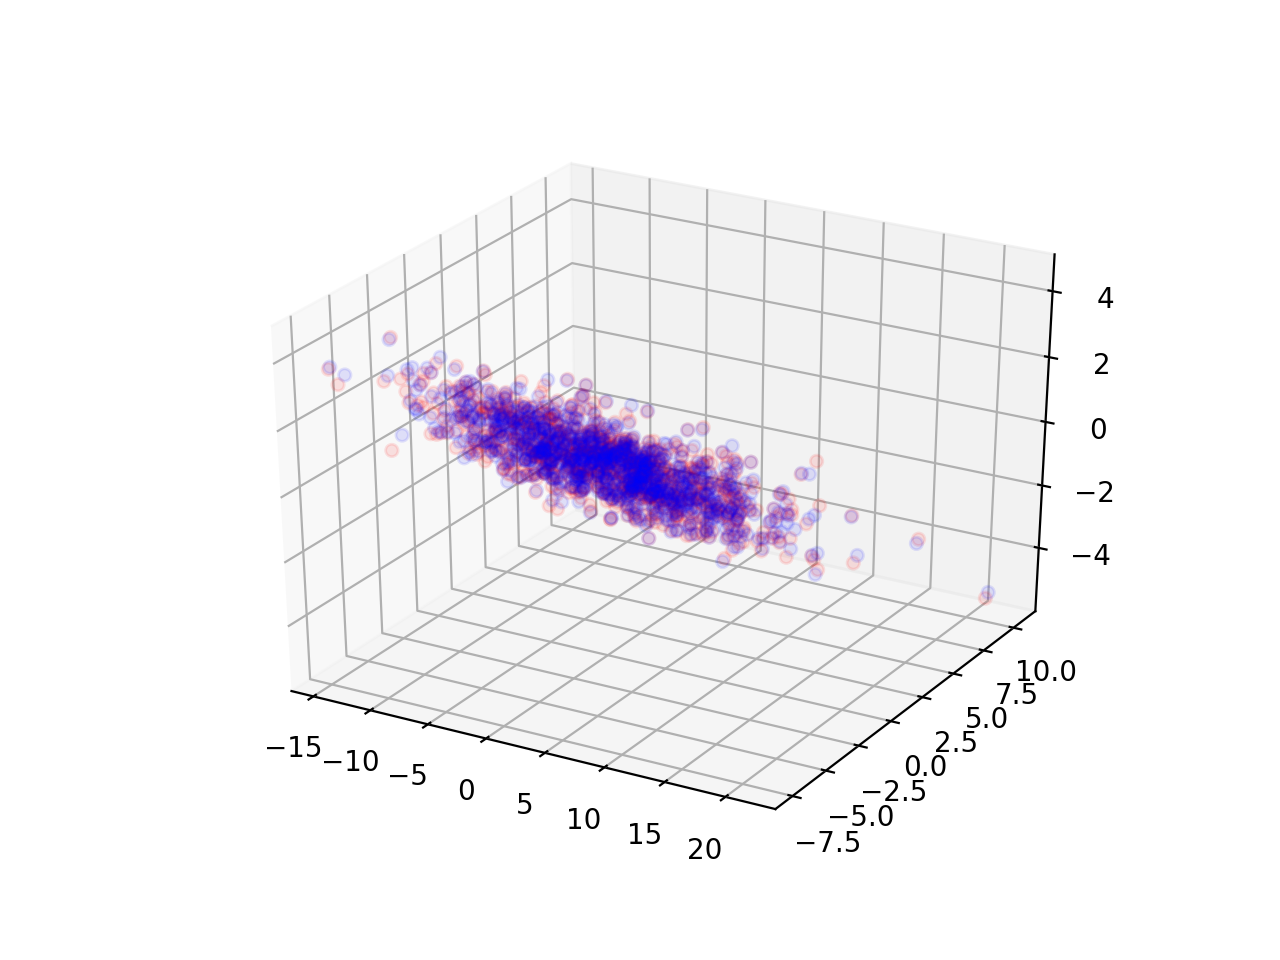

In [8]:
X_r2 = s[0] * U[:,[0]] @ VT[[0], :] + s[1] * U[:,[1]] @ VT[[1], :]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)
ax.scatter(X_r2[:,0], X_r2[:,1], X_r2[:,2], c='b', marker='o', label='Data', alpha=0.1)

The rank-2 approximation lies in a plane and captures dominant component of the data.

## j
||E|| = sum of squared singular values, from the 3rd entry to the last entry.

In [9]:
s_sq = np.square(s)
E_r0 = np.sum(s_sq, axis=0)
E_r1 = E_r0 - s_sq[0]
E_r2 = E_r1 - s_sq[1]
print("Norm of error for rank-1: ", E_r1)
print("Norm of error for rank-2: ", E_r2)

Norm of error for rank-1:  626.6899203862777
Norm of error for rank-2:  152.945575778864


# 3

In [10]:
in_data = loadmat('face_emotion_data.mat')
for key in in_data.keys():
    print(key)
# print(in_data['X'])
X = in_data['X']
y = in_data['y']

__header__
__version__
__globals__
y
X


In [11]:
# Splitting data into subsets
from itertools import permutations 

y_subsets = np.split(y, 8)
X_subsets = np.split(X, 8)

perm_list = list(permutations(range(0, 8), 2))
print(X_subsets[1][1])

[-1.35097581 -1.92086797 -1.93904099 -1.78952673 -0.77347615 -0.6731196
 -1.0723605  -1.24678856 -1.10963342]


In [12]:
def build_trainsets(X, y, a, b):
    X_test = X.copy()
    y_test = y.copy()
    # ensure a > b
    if (a < b):
        temp = a
        a = b
        b = temp
        X_test = np.delete(X_test, [a* 16, (a+1)*16], axis=0)
        y_test = np.delete(y_test, [a* 16, (a+1)*16], axis=0)
        X_test = np.delete(X_test, [b* 16, (b+1)*16], axis=0)
        y_test = np.delete(y_test, [b* 16, (b+1)*16], axis=0)
    return (X_test, y_test)

def est_error_rate(X, y, w):
    errors = 0
    for i in range(0, 16):
        if (np.sign(X[i, :] @ w) != y[i]):
            errors+=1
    err_rate = errors / 16
    return err_rate

## a truncated SVD

In [24]:
def trunk_SVD(X, y, r):
    U,s,VT = np.linalg.svd(X,full_matrices=False)
    UT = U.T
    V = VT.T
    a, b = X.shape
    X_inv = np.zeros((b, a))
    for i in range(r):
        X_inv += (1/s[i]) * V[:, [i]] @ UT[[i], :]
    w = X_inv @ y
    return w


r_set = np.array(range(1, 10))
# find best w using truncated SVD
errates_TSVD = []
for perm in perm_list:
    X_t, y_t = build_trainsets(X, y, perm[0], perm[1])
    w_set = []
    # for each choice of regularzier
    for i in range(0, 9):
        # use 6 subsets to train w
        w_set.append(trunk_SVD(X_t, y_t, r_set[i]))
    # selecting best regularizer
    X_v = X_subsets[perm[0]]
    y_v = y_subsets[perm[0]]
    w0= w_set[0] # w0 as best w
    e0 = 9999999
    for wi in w_set:
        ei = np.linalg.norm((X_v @ wi - y_v))
        if (ei < e0):
            w0 = wi
            e0 = ei
    # estimating error rate of the w0
    errate = est_error_rate(X_subsets[perm[1]], y_subsets[perm[1]], w0)
    errates_TSVD.append(errate)
print("Overall error rate using Truncated SVD is ", np.average(errates_TSVD))

Overall error rate using Truncated SVD is  0.029017857142857144


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  # Remove the CWD from sys.path while we load stuff.


## b Ridge Regression

In [25]:
def ridge_regres(X, y, l):
    U,s,VT = np.linalg.svd(X,full_matrices=False)
    I = np.identity(len(X[0]))
    S_sq = np.diag(np.square(s))
    w = VT.T @ np.linalg.inv(S_sq + l * I) @ np.diag(s) @ U.T @ y
    return w


l_set = np.array([0, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4])
# find best w using ridge regression
errates_RR = []
for perm in perm_list:
    X_t, y_t = build_trainsets(X, y, perm[0], perm[1])
    w_set = []
    # for each choice of regularzier
    for i in range(0, 7):
        # use 6 subsets to train w
        w_set.append(ridge_regres(X_t, y_t, l_set[i]))
    # selecting best regularizer
    X_v = X_subsets[perm[0]]
    y_v = y_subsets[perm[0]]
    w0= w_set[0] # w0 as best w
    e0 = 9999999
    for wi in w_set:
        ei = np.linalg.norm((X_v @ wi - y_v))
        if (ei < e0):
            w0 = wi
            e0 = ei
    # estimating error rate of the w0
    errate = est_error_rate(X_subsets[perm[1]], y_subsets[perm[1]], w0)
    errates_RR.append(errate)
print("Overall error rate using ridge regression is ", np.average(errates_RR))

Overall error rate using ridge regression is  0.022321428571428572


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  # Remove the CWD from sys.path while we load stuff.
